<a href="https://colab.research.google.com/github/diegogc506/SummerInternship2021WSU/blob/main/Basic_Math_Model_of_Hurricane_winds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
# Defining parameters
K = 1.14
B = 10
r_mw = 30
r_s = 400
w_m = 75
psi = (1/r_mw)*math.log(K/(K-1))
E = K*w_m

In [26]:
# Piecewise Mathematical equation 'W(x)' for windspeed with respect to distance from hurricane eye
def w(dist):
  if dist>= 0 and dist<30:
    ans = (E)*(1 - np.exp(-1*psi*dist))
  if dist>=r_mw and dist<=r_s:
    ans = w_m*np.exp(-1*(np.log(B)/(r_s-r_mw))*(dist-r_mw))
  if dist>r_s:
    ans = 0
  return ans;

# function to define distance from center point
def distance(c_xval, c_yval, x_xval, x_yval):
  L = math.sqrt((c_xval-x_xval)**2 + (c_yval-x_yval)**2)
  return L;

w(0)

0.0

In [33]:
def staticmodel(c_xval, c_yval):
  # try to use grid to get directly to distance formula
  df = pd.DataFrame()
  # define hurricane center
  for x in range(400):
    nums = []
    for y in range(400):
      nums.append(w(distance(c_xval, c_yval, x,y)))
    ser = pd.Series(data=nums, name=str(x))
    df = df.append(ser)
  return df

# moving center using vector
def vector_shift(angle, magnitude, rads_bool, c_xval, c_yval):
  if rads_bool == True:
    c_xval += math.cos(angle)*magnitude
    c_yval += math.sin(angle)*magnitude
  else:
    c_xval += math.cos(angle*180/math.pi)*magnitude
    c_yval += math.sin(angle*180/math.pi)*magnitude
  return(c_xval,c_yval)

  # def timestep_2hr(orig_x, orig_y, hurrpath

In [28]:
# take positions on hurricane track as a list of x and y points
xcenters = [100,110,120,130,140,150]
ycenters = [100,90,80,70,60,50]

# return timestep (dictionary) taking in path values for x and y
# NOTE: this only moves the center, it has not yet implemented the algorithm
def Timestep(xcenters,ycenters):
  Timestep = {}
  columns = []
  for i in range(len(xcenters)):
    name = 'TS' + str(i)
    Timestep[name] = staticmodel(xcenters[i],ycenters[i])
  return Timestep

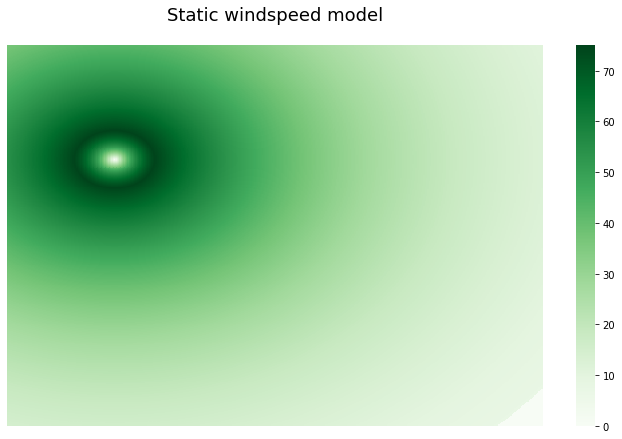

In [37]:
#@title create/access timestep { run: "auto" }
step = 2 #@param {type:"slider", min:0, max:5, step:1}
TS = 'TS' + str(step)
model=Timestep(xcenters, ycenters)
df = model[TS]

fig, ax = plt.subplots(figsize=(12,7))
title = "Static windspeed model"
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(df, annot=False, cmap='Greens', linewidths=0.0, ax=ax)
plt.show()

In [30]:
# establish y & x values for hurricane eye
c_xval = 5
c_yval = 5
df = pd.DataFrame()
# define hurricane center
for x in range(200):
  nums = []
  for y in range(200):
    nums.append(w(distance(c_xval, c_yval, x,y)))
  ser = pd.Series(data=nums, name=str(x))
  df = df.append(ser)
df.head(35)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,33.345239,30.852259,28.622183,26.821815,25.636263,25.220453,25.636263,26.821815,28.622183,30.852259,33.345239,35.971751,38.639581,41.286211,43.870735,46.367316,48.760421,51.041516,53.206805,55.255685,57.189693,59.011783,60.725823,62.336246,63.847805,65.265401,66.593964,67.838372,69.003387,70.093623,71.113516,72.067312,72.959055,73.792589,74.571552,74.807105,74.349107,73.893541,73.440430,72.989792,...,34.435431,34.221908,34.009707,33.798821,33.589241,33.380959,33.173968,32.968259,32.763824,32.560656,32.358747,32.158088,31.958673,31.760493,31.563542,31.367810,31.173291,30.979978,30.787862,30.596937,30.407195,30.218629,30.031231,29.844995,29.659912,29.475977,29.293181,29.111519,28.930982,28.751564,28.573258,28.396057,28.219955,28.044943,27.871017,27.698168,27.526391,27.355679,27.186025,27.017422
1,30.852259,27.925736,25.220453,22.954579,21.409772,20.855853,21.409772,22.954579,25.220453,27.925736,30.852259,33.853296,36.836628,39.746436,42.550076,45.229481,47.775762,50.185839,52.460309,54.602091,56.615546,58.505896,60.278843,61.940307,63.496258,64.952597,66.315081,67.589275,68.780518,69.893905,70.934283,71.906242,72.814124,73.662023,74.453797,74.876187,74.415597,73.957599,73.502201,73.049409,...,34.441650,34.228049,34.015771,33.804810,33.595155,33.386800,33.179737,32.973956,32.769452,32.566215,32.364237,32.163512,31.964031,31.765786,31.568770,31.372976,31.178395,30.985021,30.792845,30.601860,30.412060,30.223436,30.035981,29.849689,29.664551,29.480562,29.297713,29.115997,28.935408,28.755939,28.577582,28.400332,28.224180,28.049120,27.875146,27.702250,27.530426,27.359668,27.189969,27.021321
2,28.622183,25.220453,21.943083,19.048565,16.957205,16.175231,16.957205,19.048565,21.943083,25.220453,28.622183,32.005365,35.293826,38.448143,41.449261,44.289633,46.968345,49.488334,51.854770,54.074070,56.153302,58.099802,59.920939,61.623965,63.215919,64.703572,66.093391,67.391525,68.603798,69.735712,70.792451,71.778895,72.699627,73.558950,74.360899,74.930196,74.467564,74.007651,73.550455,73.095970,...,34.446489,34.232827,34.020490,33.809469,33.599756,33.391344,33.184225,32.978389,32.773830,32.570539,32.368509,32.167732,31.968199,31.769904,31.572838,31.376995,31.182366,30.988944,30.796721,30.605690,30.415844,30.227176,30.039677,29.853341,29.668161,29.484128,29.301238,29.119481,28.938852,28.759342,28.580947,28.403657,28.227467,28.052369,27.878358,27.705425,27.533566,27.362772,27.193037,27.024355
3,26.821815,22.954579,19.048565,15.338760,12.372484,11.155703,12.372484,15.338760,19.048565,22.954579,26.821815,30.551290,34.101836,37.458394,40.618448,43.585766,46.367316,48.971640,51.407973,53.685741,55.814276,57.802646,59.659563,61.393335,63.011841,64.522526,65.932402,67.248067,68.475713,69.621148,70.689812,71.686799,72.616875,73.484496,74.293828,74.968925,74.504821,74.043528,73.585036,73.129332,...,34.449947,34.236241,34.023861,33.812798,33.603044,33.394591,33.187431,32.981556,32.776958,32.573629,32.371561,32.170746,31.971177,31.772846,31.575745,31.379866,31.185203,30.991747,30.799491,30.608427,30.418548,30.229848,30.042317,29.855950,29.670739,29.486677,29.303756,29.121970,28.941312,28.761774,28.583350,28.406033,28.229815,28.054691,27.880653,27.707694,27.535808,27.364989,27.195229,27.026522
4,25.636263,21.409772,16.957205,12.372484,8.048170,5.772731,8.048170,12.372484,16.957205,21.409772,25.636263,29.614628,33.345239,36.836628,40.100442,43.149391,45.996326,48.653808,51.133902,53.448080,55.607182,57.621418,59.500374,61.253036,62.887821,64.412599,65.834730,67.161091,68.398106,69.551771,70.627688,71.631082,72.566831,73.439487,74.253296,74.992224,74.527230,74.065104,73.605830,73.149391,...,34.452021,34.238290,34.025884,33.814795,33.605017,33.396539,33.189355,32.983456,32.778835,32.57548

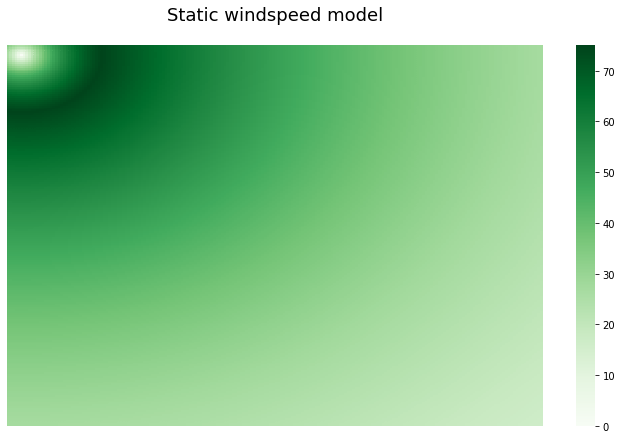

In [31]:
fig, ax = plt.subplots(figsize=(12,7))
title = "Static windspeed model"
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(df, annot=False, cmap='Greens', linewidths=0.0, ax=ax)
plt.show()